# Análise explóratória e descritiva

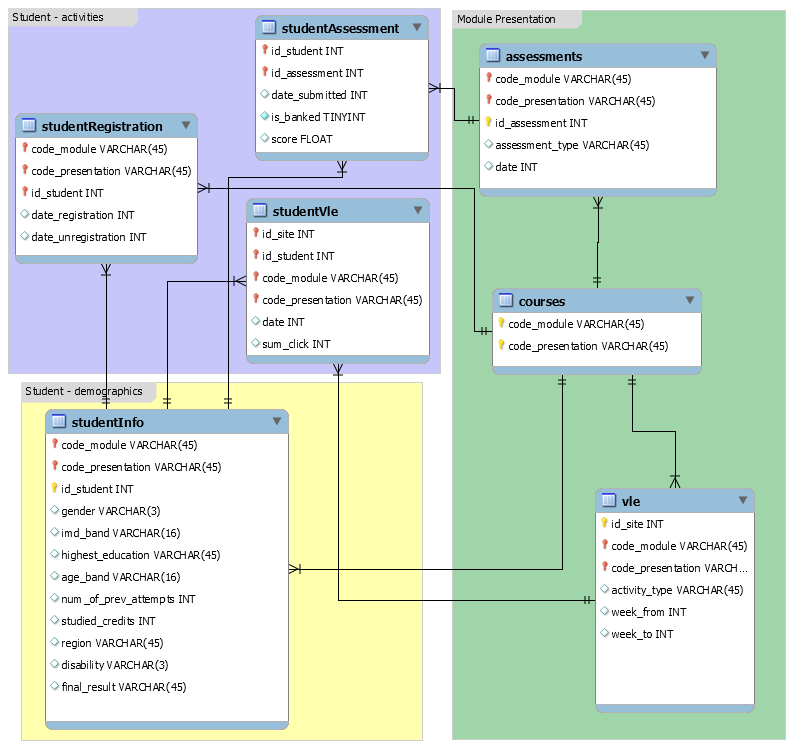

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import numpy as np

In [287]:
informacao_estudante = pd.read_csv('Dados/studentInfo.csv')
estudantes_registrados = pd.read_csv('Dados/studentRegistration.csv')
studentAssessment = pd.read_csv('Dados/studentAssessment.csv')
cursos = pd.read_csv('Dados/courses.csv')
ava = pd.read_csv('Dados/vle.csv')
assessments = pd.read_csv('Dados/assessments.csv')

In [288]:
chunks = []
for chunk in pd.read_csv('Dados/studentVle.csv',low_memory=False,chunksize=10000):
    chunks.append(chunk)
    estudante_ava_teste = pd.concat(chunks)

In [289]:
estudante_ava =estudante_ava_teste.copy()

In [290]:
informacao_estudante.sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
31609,GGG,2014B,628722,M,London Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Fail
938,BBB,2013B,316841,F,South East Region,A Level or Equivalent,30-40%,35-55,0,60,N,Pass
28356,FFF,2014J,596805,M,Scotland,HE Qualification,NaN,0-35,2,60,N,Withdrawn
21805,EEE,2014J,654325,M,Wales,A Level or Equivalent,20-30%,0-35,0,60,N,Withdrawn
12213,CCC,2014J,646071,M,Scotland,Post Graduate Qualification,80-90%,0-35,0,60,N,Pass


In [291]:
qtd_linhas= informacao_estudante.shape[0]

In [292]:
print('no informacao_estudante a quantidade de linhas  é {}   e a quantidade de colunas é {}: '.format(informacao_estudante.shape[0],informacao_estudante.shape[1]))

no informacao_estudante a quantidade de linhas  é 32593   e a quantidade de colunas é 12: 


Traduzir colunas

In [293]:
colunas_traducao = {
'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao'  ,     
'id_student' : 'id_estudante'   ,
'gender' : 'sexo'          ,
'region' : 'regiao'         ,      
'highest_education' : 'nivel_educacao',    
'imd_band' : 'ind_privacao_multipla'   ,
'age_band' : 'faixa_etaria'            ,
'num_of_prev_attempts' : 'qtd_inscricao_modulo',
'studied_credits' : 'nu_credito'  ,
'disability' : 'deficiencia'      ,
'final_result' : 'resultado_final'
}

In [294]:
informacao_estudante = informacao_estudante.rename(columns = colunas_traducao)

In [295]:
informacao_estudante.head(3)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [296]:
# Sem dados nulos
informacao_estudante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
cod_modulo               32593 non-null object
cod_apresentacao         32593 non-null object
id_estudante             32593 non-null int64
sexo                     32593 non-null object
regiao                   32593 non-null object
nivel_educacao           32593 non-null object
ind_privacao_multipla    31482 non-null object
faixa_etaria             32593 non-null object
qtd_inscricao_modulo     32593 non-null int64
nu_credito               32593 non-null int64
deficiencia              32593 non-null object
resultado_final          32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [297]:
qtd_estudantes = len(informacao_estudante['id_estudante'].unique())

In [298]:
informacao_estudante_sem_duplicado = informacao_estudante.drop_duplicates(subset='id_estudante', keep='first')
informacao_estudante_sem_duplicado

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [299]:
informacao_estudante_sem_duplicado

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [462]:
qtd_estudante = informacao_estudante_sem_duplicado['sexo'].value_counts()
qtd_estudante

M    15046
F    13739
Name: sexo, dtype: int64

In [300]:
percent_sexo = informacao_estudante_sem_duplicado['sexo'].value_counts(normalize=True) * 100
percent_sexo

M    52.27028
F    47.72972
Name: sexo, dtype: float64

In [301]:
percent_sexo = pd.DataFrame(percent_sexo).reset_index().rename(columns={'index': 'sexo', 'sexo':'percent'})
percent_sexo

,sexo,percent
0,M,52.27028
1,F,47.72972


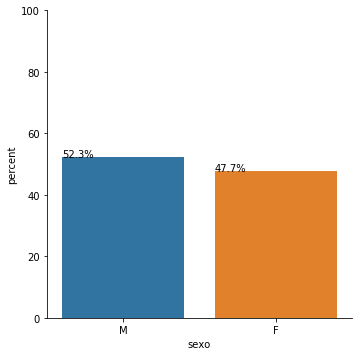

In [302]:
g = sns.catplot(x='sexo', y='percent', kind='bar', data=percent_sexo) 
g.ax.set_ylim(0,100)
#Este código percorre os patches contidos no objeto ax do gráfico e obtém os valores de altura arredondados para 1 decimal, 
#adiciona o sinal de porcentagem e coloca esse texto no topo das barras.
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Criando peso para cada nível educacional

In [303]:
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'No Formal quals','id_nivel_educacao']= 0
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'Lower Than A Level','id_nivel_educacao']= 1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'A Level or Equivalent','id_nivel_educacao']= 2
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'HE Qualification','id_nivel_educacao']= 3
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'Post Graduate Qualification','id_nivel_educacao']= 4

informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.deficiencia == 'Y','id_deficiencia']= 1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.deficiencia == 'N','id_deficiencia']= 0

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [304]:
informacao_estudante_sem_duplicado.head(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,3.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1.0,0.0


In [305]:
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'No Formal quals','id_nivel_educacao']= 0
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'Lower Than A Level','id_nivel_educacao']= 1
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'A Level or Equivalent','id_nivel_educacao']= 2
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'HE Qualification','id_nivel_educacao']= 3
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'Post Graduate Qualification','id_nivel_educacao']= 4

informacao_estudante.loc[informacao_estudante.deficiencia == 'Y','id_deficiencia']= 1
informacao_estudante.loc[informacao_estudante.deficiencia == 'N','id_deficiencia']= 0

Convertendo datatype

In [306]:
informacao_estudante.id_nivel_educacao = informacao_estudante.id_nivel_educacao.astype(int)
informacao_estudante.id_deficiencia = informacao_estudante.id_deficiencia.astype(int)
informacao_estudante_sem_duplicado.idnivel_educacao = informacao_estudante_sem_duplicado.id_nivel_educacao.astype(int)
informacao_estudante_sem_duplicado.id_deficiencia = informacao_estudante_sem_duplicado.id_deficiencia.astype(int)
informacao_estudante_sem_duplicado.tail(3)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,2.0,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,1.0,0
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,3.0,0


In [307]:
informacao_estudante.nivel_educacao.unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

Média do nível educacional por sexo

In [308]:
media_educacao = informacao_estudante_sem_duplicado[['id_nivel_educacao', 'sexo']].groupby(['sexo'], as_index=False).mean()
media_educacao

,sexo,id_nivel_educacao
0,F,1.676614
1,M,1.777150


In [309]:
informacao_estudante['id_sexo'] = 0
# estudantes unicos
informacao_estudante_sem_duplicado['id_sexo'] = 0

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [310]:
informacao_estudante.loc[informacao_estudante.sexo == 'F','id_sexo']=1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.sexo == 'F','id_sexo']=1
informacao_estudante_sem_duplicado.head(3)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,3.0,0,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3.0,0,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1,1


In [311]:
group_sexo_educacao = informacao_estudante_sem_duplicado[['nivel_educacao', 'sexo', 'id_sexo']].groupby(['nivel_educacao', 'sexo']).count()
group_sexo_educacao_final = pd.DataFrame(group_sexo_educacao).reset_index().rename(columns={'id_sexo': 'qtd_sexo'})
group_sexo_educacao_final

,nivel_educacao,sexo,qtd_sexo
0,A Level or Equivalent,F,5935
1,A Level or Equivalent,M,6420
2,HE Qualification,F,1658
3,HE Qualification,M,2434
4,Lower Than A Level,F,5875
5,Lower Than A Level,M,5905
6,No Formal quals,F,192
7,No Formal quals,M,114
8,Post Graduate Qualification,F,79
9,Post Graduate Qualification,M,173


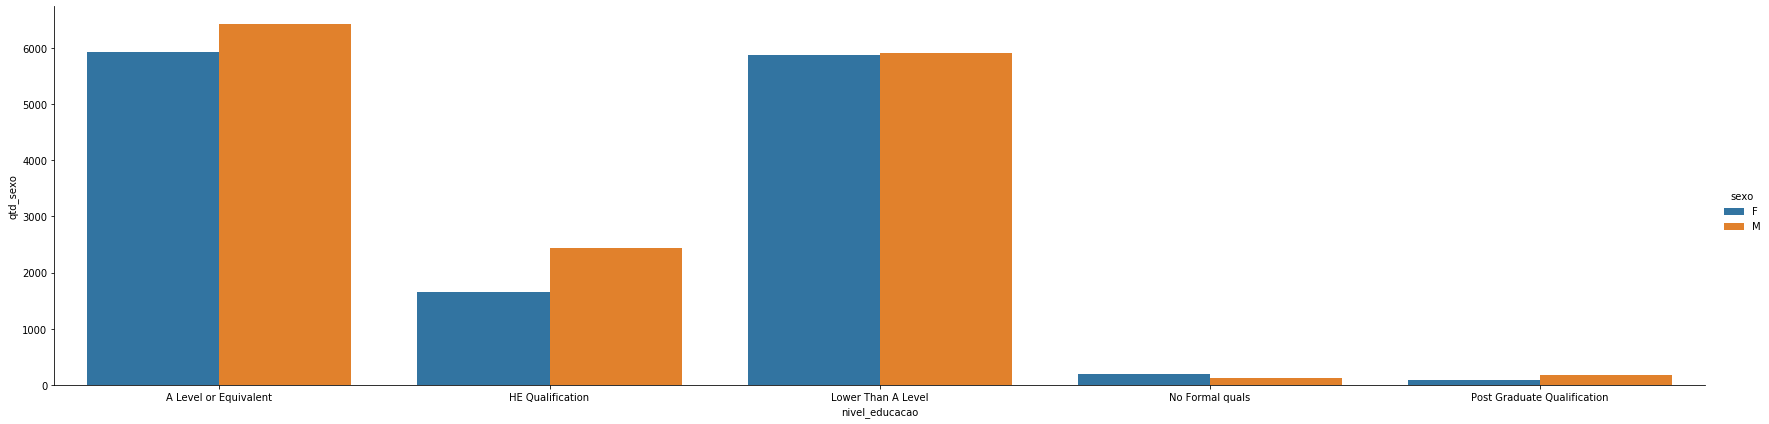

In [312]:
g = sns.catplot(x="nivel_educacao", y="qtd_sexo",

                hue="sexo", 

                data=group_sexo_educacao_final, kind="bar",

                height=6, aspect=4);

Sexo não é um denominador para nível educacional

-----------------------------------------
Alunos com algum tipo de deficiencia

In [313]:
selecao = informacao_estudante_sem_duplicado.deficiencia == 'Y'
localizar_selecao =  informacao_estudante_sem_duplicado[selecao]
localizar_selecao

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1,1
45,AAA,2013J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,1.0,1,1
52,AAA,2013J,146188,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,Y,Fail,2.0,1,1
55,AAA,2013J,148993,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1,1
86,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32567,GGG,2014J,2053521,F,South West Region,A Level or Equivalent,20-30%,35-55,1,30,Y,Pass,2.0,1,1
32576,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn,2.0,1,1
32581,GGG,2014J,2456431,F,South Region,Lower Than A Level,70-80%,0-35,0,30,Y,Fail,1.0,1,1
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,2.0,1,1


In [314]:
print('Quantidade de estudantes PCD {} '.format(informacao_estudante_sem_duplicado.id_deficiencia.value_counts()[1]))

Quantidade de estudantes PCD 2717 


In [315]:
pcd_porcentagem = (informacao_estudante_sem_duplicado.id_deficiencia.value_counts()[1] /len(informacao_estudante_sem_duplicado))*100
pcd_porcentagem

9.438943894389439

Análise resultado final

Um módulo pode ter mais de um cod_apresentação. Verificaremos o resultado considerando que o aluno pode reprovar em uma apresentação

In [316]:
qtd_resultado = pd.DataFrame(informacao_estudante['resultado_final'].value_counts(normalize=True) * 100)
qtd_resultado = qtd_resultado.reset_index().rename(columns={'index': 'Resultado'})
qtd_resultado

,Resultado,resultado_final
0,Pass,37.925321
1,Withdrawn,31.160065
2,Fail,21.636548
3,Distinction,9.278066


Percentual do Resultado final

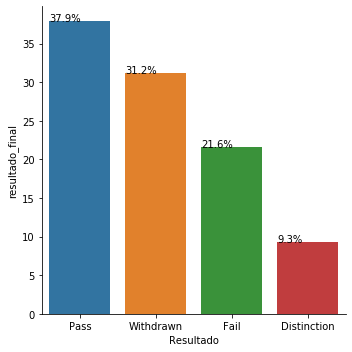

In [317]:
g = sns.catplot(x='Resultado', y='resultado_final', kind='bar', data=qtd_resultado) 
#g.ax.set_ylim(0,100)
#Este código percorre os patches contidos no objeto ax do gráfico e obtém os valores de altura arredondados para 1 decimal, 
#adiciona o sinal de porcentagem e coloca esse texto no topo das barras.
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

número alto de reprovados

In [318]:
estudantes_registrados.tail(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [319]:
# dt_cancelameto tem dados nulos
estudantes_registrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [320]:
#tratar nulos
estudantes_registrados = estudantes_registrados.fillna(0)
estudantes_registrados

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,0.0
1,AAA,2013J,28400,-53.0,0.0
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,0.0
4,AAA,2013J,32885,-176.0,0.0
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0
32589,GGG,2014J,2645731,-23.0,0.0
32590,GGG,2014J,2648187,-129.0,0.0
32591,GGG,2014J,2679821,-49.0,101.0


In [321]:
estudantes_registrados_traduçao = {'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao'  ,     
'id_student' : 'id_estudante'   ,
'date_registration' : 'dt_registro',
'date_unregistration' : 'dt_cancelamento'
}

In [322]:
estudantes_registrados = estudantes_registrados.rename(columns = estudantes_registrados_traduçao)

In [323]:
informacao_estudante_registro_merge = pd.merge(informacao_estudante,estudantes_registrados , how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'] )
informacao_estudante_registro_merge.head(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo,dt_registro,dt_cancelamento
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,3,0,0,-159.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3,0,1,-53.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,1,1,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2,0,1,-52.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1,0,1,-176.0,0.0


In [324]:
cursos = cursos.rename(columns={'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao',
'module_presentation_length': 'tamanho_apresentacao_modulo'})

In [325]:
cursos.head(3)

,cod_modulo,cod_apresentacao,tamanho_apresentacao_modulo
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268


Ao realizar merge conseguimos fazer join entre os dataframes , assim enriquecemos nosssa análise

In [326]:
informacao_estudante_registro_curso_merge = pd.merge(informacao_estudante_registro_merge, cursos, how='left', on=['cod_modulo', 'cod_apresentacao'] )

In [327]:
informacao_estudante_registro_curso_merge.head(2)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo,dt_registro,dt_cancelamento,tamanho_apresentacao_modulo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,3,0,0,-159.0,0.0,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3,0,1,-53.0,0.0,268


In [328]:
informacao_estudante_registro_curso_merge.shape

(32593, 18)

In [329]:
informacao_estudante_registro_curso_merge.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [330]:
informacao_estudante_registro_curso_merge.cod_modulo.value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: cod_modulo, dtype: int64

In [331]:
selecao = informacao_estudante_registro_curso_merge['dt_cancelamento'] != 0
buscar = informacao_estudante_registro_curso_merge[selecao]
qtd_cancelados_modulo = pd.DataFrame(buscar.cod_modulo.value_counts())
qtd_cancelados_modulo

,cod_modulo
FFF,2261
BBB,2246
DDD,2155
CCC,1911
EEE,668
GGG,286
AAA,126


In [332]:
buscar

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo,dt_registro,dt_cancelamento,tamanho_apresentacao_modulo
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,1,1,-92.0,12.0,268
15,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,2,0,1,-180.0,96.0,268
22,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,1,0,0,-170.0,72.0,268
29,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,3,0,0,5.0,175.0,268
41,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,2,0,0,-197.0,135.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn,2,1,1,-23.0,58.0,269
32577,GGG,2014J,2342238,M,Ireland,HE Qualification,80-90%,0-35,0,30,N,Withdrawn,3,0,0,-45.0,74.0,269
32578,GGG,2014J,2357806,F,Ireland,Lower Than A Level,40-50%,35-55,0,30,N,Withdrawn,1,0,1,-128.0,73.0,269
32586,GGG,2014J,2608143,M,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn,3,0,0,-45.0,48.0,269


In [333]:
qtd_cancelados_modulo.reset_index(level=0, inplace=True) 
qtd_cancelados_modulo

,index,cod_modulo
0,FFF,2261
1,BBB,2246
2,DDD,2155
3,CCC,1911
4,EEE,668
5,GGG,286
6,AAA,126


In [334]:
qtd_cancelados_modulo.cod_modulo.sum()

9653

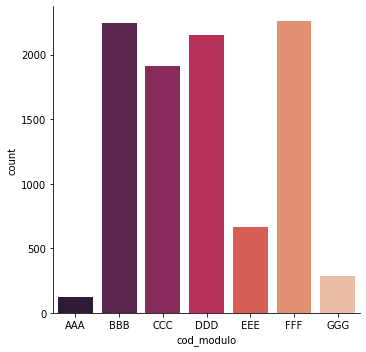

In [335]:
ax = sns.catplot(x="cod_modulo", kind="count", palette="rocket",data=buscar)

Porcentagem de cancelamentos sobre total de estudantes por modulo/apresentação

In [336]:
AAA_porcentagem =  (qtd_cancelados_modulo.cod_modulo[6] /qtd_linhas)*100
BBB_porcentagem  = (qtd_cancelados_modulo.cod_modulo[1] /qtd_linhas)*100
CCC_porcentagem = (qtd_cancelados_modulo.cod_modulo[3] /qtd_linhas)*100
DDD_porcentagem = (qtd_cancelados_modulo.cod_modulo[2] /qtd_linhas)*100
EEE_porcentagem = (qtd_cancelados_modulo.cod_modulo[4] /qtd_linhas)*100
FFF_porcentagem = (qtd_cancelados_modulo.cod_modulo[0] /qtd_linhas)*100
GGG_porcentagem  = (qtd_cancelados_modulo.cod_modulo[5] /qtd_linhas)*100

In [337]:
modulo=['AAA','BBB','CCC','DDD','EEE','FFF','GGG']
porcentagem_cancelados = ([AAA_porcentagem, BBB_porcentagem, CCC_porcentagem,
      DDD_porcentagem, EEE_porcentagem, FFF_porcentagem, GGG_porcentagem])
porcentagem_cancelados = pd.DataFrame(porcentagem_cancelados, columns=['porcentagem_cancelados'], index=modulo).round(2)
porcentagem_cancelados = porcentagem_cancelados.reset_index().rename(columns={'index':'modulo'})
porcentagem_cancelados

,modulo,porcentagem_cancelados
0,AAA,0.39
1,BBB,6.89
2,CCC,5.86
3,DDD,6.61
4,EEE,2.05
5,FFF,6.94
6,GGG,0.88


In [338]:
# tamanho do modulo por resultado informacao_estudante_registro_curso_merge
df_tamanho_modulo_result = pd.DataFrame(informacao_estudante_registro_curso_merge[['resultado_final', 'tamanho_apresentacao_modulo', 'nu_credito']].groupby(['tamanho_apresentacao_modulo','resultado_final','nu_credito']).size()).reset_index().rename(columns={0:'qtd_resultado'})
df_tamanho_modulo_result = df_tamanho_modulo_result.sort_values(by='qtd_resultado', ascending=False)
df_tamanho_modulo_result.index = range(len(df_tamanho_modulo_result))
df_tamanho_modulo_result

,tamanho_apresentacao_modulo,resultado_final,nu_credito,qtd_resultado
0,268,Pass,60,1583
1,269,Pass,60,1259
2,262,Pass,60,1214
3,240,Pass,60,1110
4,241,Withdrawn,60,968
...,...,...,...,...
498,262,Pass,190,1
499,262,Pass,210,1
500,262,Pass,300,1
501,234,Withdrawn,270,1


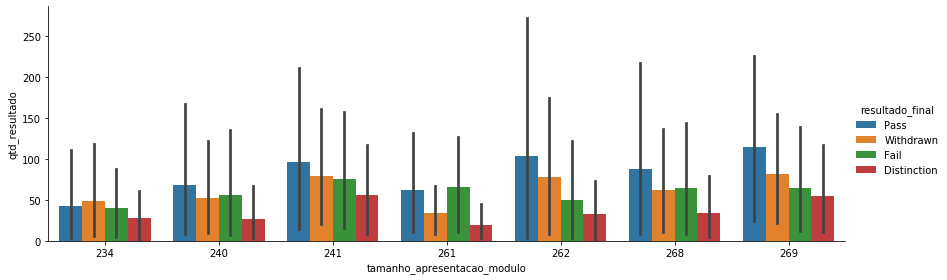

In [339]:
g0 = sns.catplot(x="tamanho_apresentacao_modulo", y="qtd_resultado",

                hue="resultado_final", 

                data=df_tamanho_modulo_result, kind="bar",

                height=4, aspect=3);

Tamanho do módulo não influencia no resultado final

In [340]:
informacao_estudante.groupby(['cod_modulo']).get_group("BBB")

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo
748,BBB,2013B,23629,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,1,0,1
749,BBB,2013B,25107,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,120,N,Pass,1,0,1
750,BBB,2013B,27891,M,Scotland,Lower Than A Level,0-10%,0-35,2,120,Y,Withdrawn,1,1,0
751,BBB,2013B,29144,M,South Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,1,0,0
752,BBB,2013B,31663,M,North Region,A Level or Equivalent,30-40%,35-55,0,60,N,Pass,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,BBB,2014J,2692969,F,Scotland,HE Qualification,80-90%,35-55,0,75,N,Pass,3,0,1
8653,BBB,2014J,2694919,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,120,Y,Pass,1,1,1
8654,BBB,2014J,2698577,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,1,0,1
8655,BBB,2014J,2698588,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,3,0,1


In [341]:
informacao_estudante.cod_modulo.count()

32593

In [342]:
ava.head(3)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN


In [343]:
traducao_ava = {'code_module': 'cod_modulo',
'code_presentation':'cod_apresentacao',
'activity_type':'tipo_atividade',
'week_from': 'semana_inicial_material',
'week_to' :'semana_final_material'
}

In [344]:
ava.rename(columns=traducao_ava, inplace=True)
ava.head(5)

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [345]:
print('Datatype vle')
ava.dtypes

Datatype vle


id_site                      int64
cod_modulo                  object
cod_apresentacao            object
tipo_atividade              object
semana_inicial_material    float64
semana_final_material      float64
dtype: object

In [346]:
print('Quantidade de linhas {} e colunas {} no dataframe AVA'.format(ava.shape[0], ava.shape[1]))

Quantidade de linhas 6364 e colunas 6 no dataframe AVA


In [347]:
selecao = ava['semana_inicial_material'].notna()
buscar = ava[selecao]
buscar.head(3)

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0


In [348]:
selecao = ava['semana_inicial_material'] == 0
buscar = ava[selecao]
buscar

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
3270,773452,DDD,2014B,url,0.0,0.0
3647,813933,DDD,2014J,oucontent,0.0,0.0


Começa a contar a primeira semana como 0. Por isso não tera tratamento de nulo inserindo 0 nos dados faltantes

In [349]:
atividade_por_site = ava[['id_site','tipo_atividade']].groupby(['tipo_atividade']).count()
atividade_por_site

,id_site
tipo_atividade,
dataplus,28
dualpane,20
externalquiz,26
folder,2
forumng,194
glossary,21
homepage,22
htmlactivity,4
oucollaborate,82


In [350]:
ava.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [351]:
estudante_ava_traducao = {
'code_module': 'cod_modulo',
'code_presentation': 'cod_apresentacao',
'id_student':'id_estudante',
'id_site': 'id_site',
'date': 'data_interacao_aluno',
'sum_click' : 'qtd_click'
}

In [352]:
estudante_ava = estudante_ava.rename(columns=estudante_ava_traducao)
estudante_ava.head(5)

,cod_modulo,cod_apresentacao,id_estudante,id_site,data_interacao_aluno,qtd_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


qual material tem maior interacao ?

In [353]:
estudante_ava[['id_site', 'qtd_click']].groupby(['id_site']).max()

,qtd_click
id_site,
526721,4098
526735,20
526737,110
526738,82
526739,46
...,...
1042376,10
1046237,7
1046812,170


In [354]:
informacao_estudante_sem_duplicado[[ 'id_estudante', 'cod_modulo', 'cod_apresentacao']].groupby(['cod_modulo', 'cod_apresentacao']).count().rename(columns={'id_estudante': 'qtd_estudante'})

qtd_estudante
cod_modulo cod_apresentacao               
AAA        2013J                       383
           2014J                       329
BBB        2013B                      1767
           2013J                      2193
           2014B                      1521
           2014J                      2211
CCC        2014B                      1936
           2014J                      2313
DDD        2013B                      1185
           2013J                      1573
           2014B                       934
           2014J                      1434
EEE        2013J                       656
           2014B                       266
           2014J                       839
FFF        2013B                      1562
           2013J                      2024
           2014B                      1201
           2014J                      1990
GGG        2013J                       907
           2014B                       818
           2014J                       743

In [355]:
estudante_ava.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [356]:
estudante_ava_merge = pd.merge(estudante_ava,ava, how='left', on=['id_site', 'cod_modulo', 'cod_apresentacao'] )

In [357]:
estudante_ava_merge.sample(5)

,cod_modulo,cod_apresentacao,id_estudante,id_site,data_interacao_aluno,qtd_click,tipo_atividade,semana_inicial_material,semana_final_material
4799270,DDD,2014J,483200,813701,4,13,homepage,NaN,NaN
3338539,DDD,2013B,422768,547556,45,8,ouwiki,NaN,NaN
1135991,BBB,2013J,593712,703939,201,2,subpage,NaN,NaN
10182764,FFF,2014J,348108,973777,229,19,oucontent,NaN,NaN
8805849,FFF,2014B,612982,779671,115,1,subpage,NaN,NaN


In [358]:
merge_estudante_ava = pd.merge( informacao_estudante,estudante_ava_merge, how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'])
merge_estudante_ava.sample(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,...,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo,id_site,data_interacao_aluno,qtd_click,tipo_atividade,semana_inicial_material,semana_final_material
3567246,DDD,2013B,560347,M,East Anglian Region,A Level or Equivalent,70-80%,35-55,0,60,...,Pass,2,0,0,547581.0,36.0,1.0,resource,NaN,NaN
4763191,DDD,2014J,268143,M,Scotland,A Level or Equivalent,10-20,35-55,1,60,...,Pass,2,0,0,813710.0,73.0,2.0,forumng,NaN,NaN
7990148,FFF,2013J,595106,M,South West Region,A Level or Equivalent,50-60%,0-35,0,60,...,Distinction,2,0,0,716216.0,93.0,5.0,forumng,NaN,NaN
3999034,DDD,2013J,572431,M,South West Region,A Level or Equivalent,30-40%,0-35,0,60,...,Pass,2,0,0,673537.0,214.0,1.0,forumng,NaN,NaN
8972743,FFF,2014B,634111,M,South East Region,HE Qualification,60-70%,0-35,0,60,...,Pass,3,0,0,779433.0,225.0,4.0,oucontent,NaN,NaN


Análise dos aprovados e reprovados

In [359]:
selecao = (merge_estudante_ava.resultado_final == 'Pass') | (merge_estudante_ava.resultado_final == 'Fail')
buscar_pass_fail = merge_estudante_ava[selecao][['cod_modulo','cod_apresentacao','id_estudante','regiao','resultado_final','nivel_educacao','id_nivel_educacao','nu_credito',
                                     'id_site','qtd_click', 'data_interacao_aluno']]
buscar_pass_fail['id_resultado'] = 0
buscar_pass_fail.loc[buscar_pass_fail.resultado_final == 'Pass','id_resultado']= '1'
buscar_pass_fail.id_resultado = buscar_pass_fail.id_resultado.astype(int)
buscar_pass_fail.head(5)

,cod_modulo,cod_apresentacao,id_estudante,regiao,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno,id_resultado
0,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546669.0,16.0,-5.0,1
1,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546662.0,44.0,-5.0,1
2,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,1
3,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546668.0,2.0,-5.0,1
4,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,1


In [360]:
#media_aprovado_reprovado = buscar[['id_estudante','qtd_click']].groupby(['id_estudante']).count()[['id_estudante','qtd_click','resultado_final']]
media_aprovado_reprovado = buscar_pass_fail.groupby(['id_estudante','resultado_final']).agg({'qtd_click':np.sum}).reset_index()
#media_aprovado_reprovado = media_aprovado_reprovado.reset_index().rename(columns={'qtd_click':'media_click'})
media_aprovado_reprovado

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
2,23629,Fail,161.0
3,23698,Pass,910.0
4,24186,Pass,184.0
...,...,...,...
18686,2698257,Pass,758.0
18687,2698535,Pass,3455.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


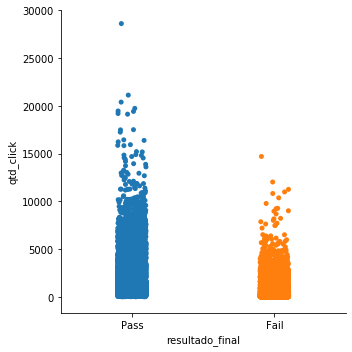

In [361]:
sns.catplot(x= 'resultado_final', y= 'qtd_click', data=media_aprovado_reprovado)

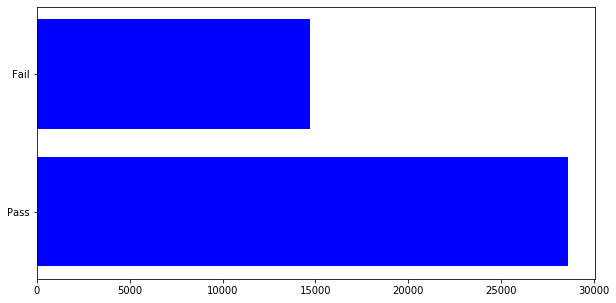

In [362]:
plt.figure(figsize=(10,5))
plt.barh(media_aprovado_reprovado.resultado_final, media_aprovado_reprovado.qtd_click, color='#0000FF')
plt.show()

In [363]:
selecao = buscar_pass_fail.id_estudante == 6516
teste = buscar_pass_fail[selecao]
teste['qtd_click'].count()

662

Quanto maior a quantidade de click maior foram as aprovações

In [364]:
pd.DataFrame(informacao_estudante_sem_duplicado[['nivel_educacao', 'id_estudante']].groupby(['nivel_educacao']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})

,nivel_educacao,qtd_estudante
0,A Level or Equivalent,12355
1,HE Qualification,4092
2,Lower Than A Level,11780
3,No Formal quals,306
4,Post Graduate Qualification,252


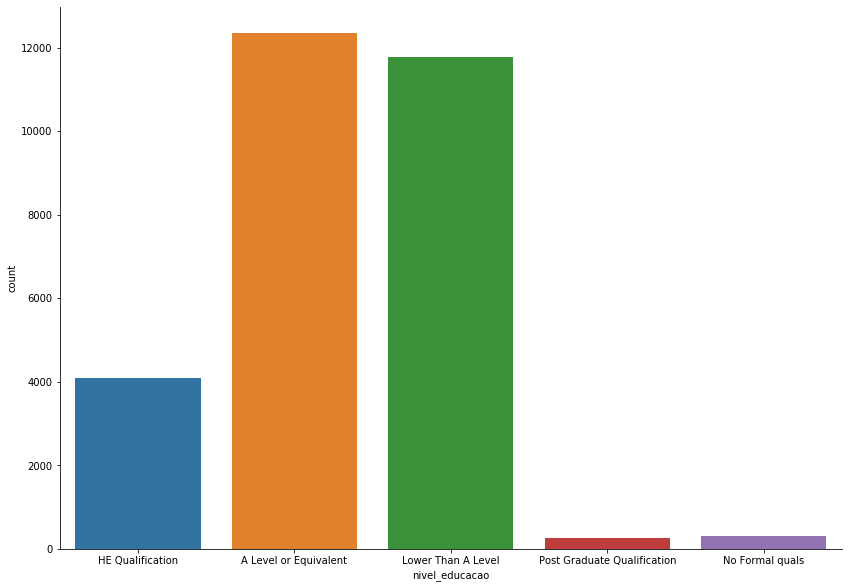

In [365]:
sns.catplot(x= 'nivel_educacao', kind='count', data=informacao_estudante_sem_duplicado, height=8.27, aspect=11.7/8.27)

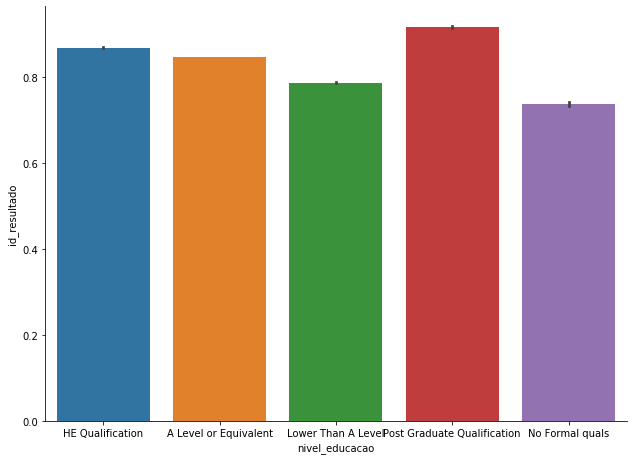

In [366]:
sns.catplot(x = 'nivel_educacao', y = 'id_resultado', data=buscar_pass_fail, kind = 'bar',height=6.50, aspect=12.7/9.27)

In [367]:
qtd_estudante_regiao = pd.DataFrame(informacao_estudante_sem_duplicado[['id_estudante', 'regiao']].groupby(['regiao']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})
qtd_estudante_regiao = qtd_estudante_regiao.sort_values(by='qtd_estudante', ascending=False)
qtd_estudante_regiao.index = range(13)
qtd_estudante_regiao

,regiao,qtd_estudante
0,East Anglian Region,3000
1,Scotland,2934
2,London Region,2845
3,South Region,2737
4,North Western Region,2548
5,West Midlands Region,2269
6,South West Region,2154
7,East Midlands Region,2095
8,Wales,1876
9,South East Region,1875


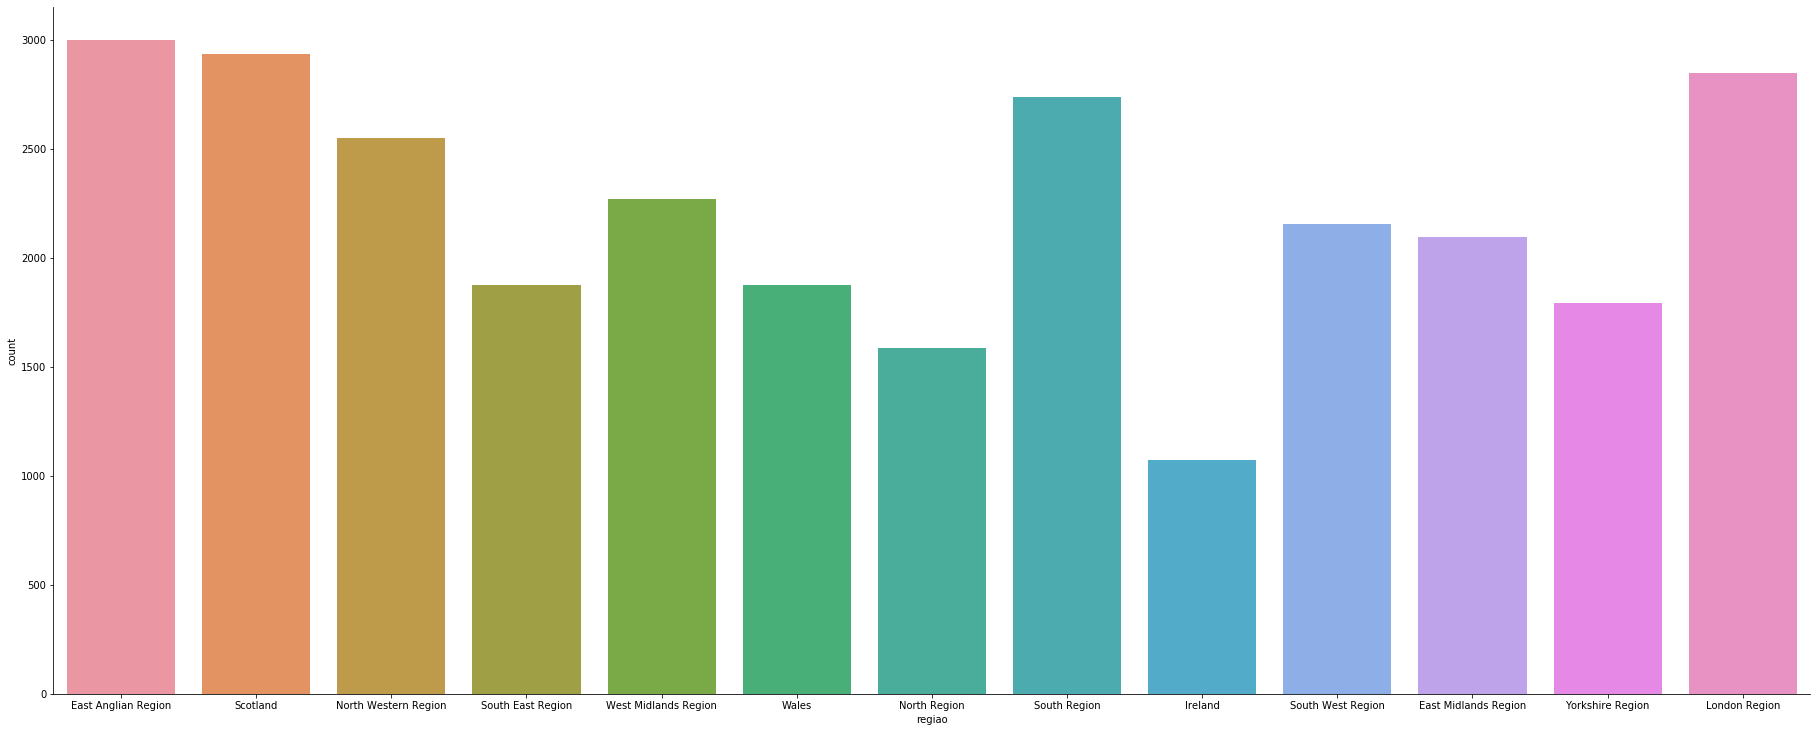

In [368]:
sns.catplot(x= 'regiao', kind='count', data=informacao_estudante_sem_duplicado, height=10.27, aspect=22.7/9.27)

In [369]:
qtd_aprov_regiao = pd.DataFrame(informacao_estudante[['id_estudante', 'regiao', 'resultado_final']].groupby(['regiao','resultado_final']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})
qtd_aprov_regiao = qtd_aprov_regiao.sort_values(by='qtd_estudante', ascending=False)
qtd_aprov_regiao.index = range(52)
qtd_aprov_regiao

,regiao,resultado_final,qtd_estudante
0,Scotland,Pass,1359
1,East Anglian Region,Pass,1309
2,South Region,Pass,1287
3,London Region,Withdrawn,1110
4,London Region,Pass,1099
5,North Western Region,Withdrawn,1034
6,East Anglian Region,Withdrawn,1006
7,North Western Region,Pass,955
8,South West Region,Pass,949
9,West Midlands Region,Pass,936


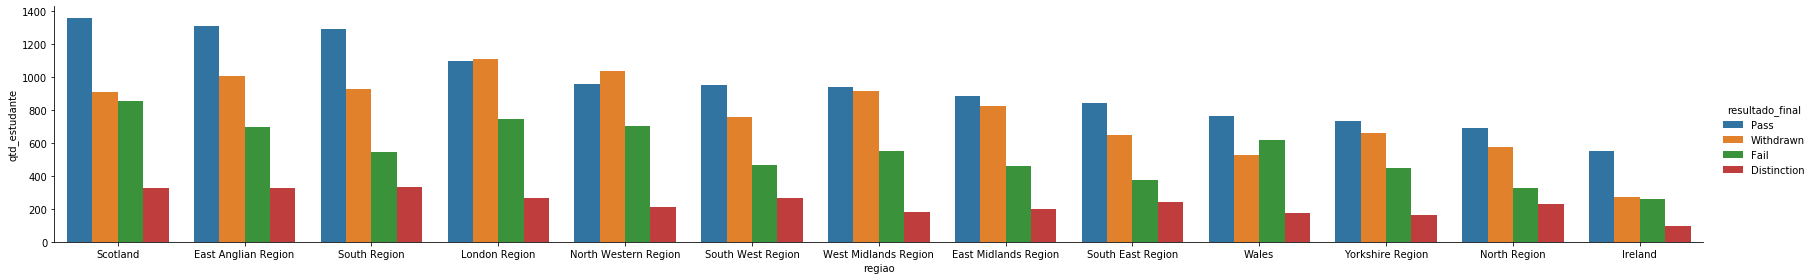

In [370]:
g1 = sns.catplot(x="regiao", y="qtd_estudante",

                hue="resultado_final", 

                data=qtd_aprov_regiao, kind="bar",

                height=4, aspect=6);

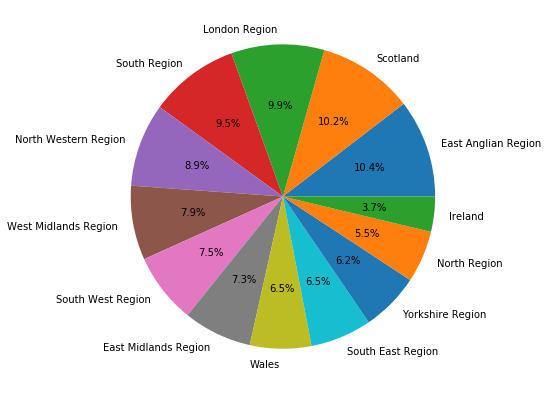

In [371]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(qtd_estudante_regiao['qtd_estudante'], labels = qtd_estudante_regiao['regiao'],autopct='%1.1f%%') 
plt.show()

In [372]:
regiao_depravacao = merge_estudante_ava[['cod_modulo','cod_apresentacao','id_estudante','regiao','ind_privacao_multipla','resultado_final','nivel_educacao','id_nivel_educacao','nu_credito',
                                     'id_site','qtd_click', 'data_interacao_aluno']]
regiao_depravacao.head(3)

,cod_modulo,cod_apresentacao,id_estudante,regiao,ind_privacao_multipla,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno
0,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546669.0,16.0,-5.0
1,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546662.0,44.0,-5.0
2,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546652.0,1.0,-5.0


In [373]:
regiao_depravacao['ind_privacao_multipla'].isnull().sum()

601942

In [374]:
regiao_depravacao['ind_privacao_multipla'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [375]:
regiao_depravacao.sample(6)

,cod_modulo,cod_apresentacao,id_estudante,regiao,ind_privacao_multipla,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno
8604562,FFF,2014B,572832,South Region,80-90%,Pass,Lower Than A Level,1,90,779668.0,1.0,58.0
3615326,DDD,2013B,2209728,South Region,90-100%,Pass,A Level or Equivalent,2,60,547929.0,1.0,114.0
1657938,BBB,2014J,637003,South East Region,20-30%,Pass,Lower Than A Level,1,60,913690.0,1.0,3.0
7393618,FFF,2013J,419024,Ireland,0-10%,Pass,A Level or Equivalent,2,60,716216.0,1.0,173.0
573805,BBB,2013B,540184,South Region,40-50%,Pass,Lower Than A Level,1,60,542807.0,4.0,236.0
565000,BBB,2013B,538232,East Midlands Region,20-30%,Withdrawn,Lower Than A Level,1,120,542864.0,10.0,42.0


In [376]:
regiao_depravacao_group = informacao_estudante_sem_duplicado[['id_estudante', 'ind_privacao_multipla']].groupby(['ind_privacao_multipla']).count().reset_index().rename(columns={'id_estudante':'qtd_estudante'})
regiao_depravacao_group_1 = regiao_depravacao_group.sort_values(by='qtd_estudante', ascending=False)
regiao_depravacao_group_1.index=range(10)
regiao_depravacao_group_1


,ind_privacao_multipla,qtd_estudante
0,20-30%,3200
1,10-20,3132
2,30-40%,3128
3,0-10%,2944
4,40-50%,2890
5,50-60%,2787
6,60-70%,2560
7,70-80%,2532
8,80-90%,2421
9,90-100%,2220


In [377]:
regiao_depravacao_result = informacao_estudante[['id_estudante','resultado_final' ,'ind_privacao_multipla']].groupby(['ind_privacao_multipla','resultado_final']).count().reset_index().rename(columns={'id_estudante':'qtd_estudante'})
regiao_depravacao_result = regiao_depravacao_result.sort_values(by='qtd_estudante', ascending=False)
regiao_depravacao_result.index=range(len(regiao_depravacao_result))
regiao_depravacao_result

,ind_privacao_multipla,resultado_final,qtd_estudante
0,30-40%,Pass,1345
1,20-30%,Withdrawn,1321
2,10-20,Withdrawn,1246
3,0-10%,Withdrawn,1231
4,50-60%,Pass,1227
5,20-30%,Pass,1226
6,40-50%,Pass,1224
7,60-70%,Pass,1209
8,70-80%,Pass,1170
9,10-20,Pass,1167


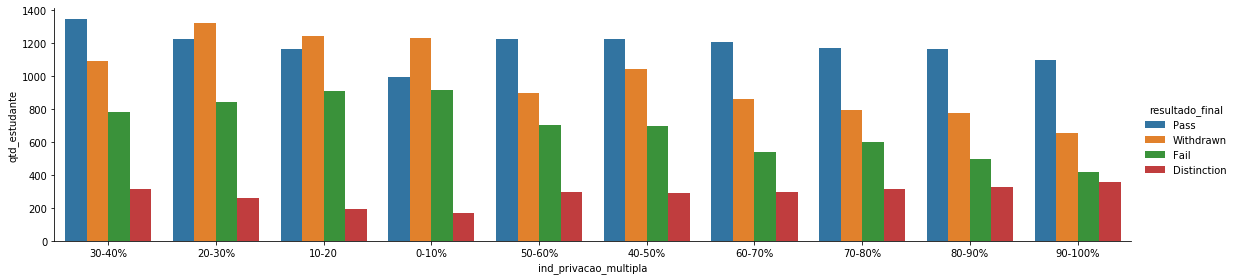

In [378]:
g3 = sns.catplot(x="ind_privacao_multipla", y="qtd_estudante",

                hue="resultado_final", 

                data=regiao_depravacao_result, kind="bar",

                height=4, aspect=4);

In [379]:
# percebe-se uma quantidade maior de cancelamentos quando o nível de ind_privacao_multipla é baixo (maior indice de pobreza).
#isso se mantem até a faixa do 20-30 %.  apos esse indice vai diminuindo e a taxa de aprovação aumentando.

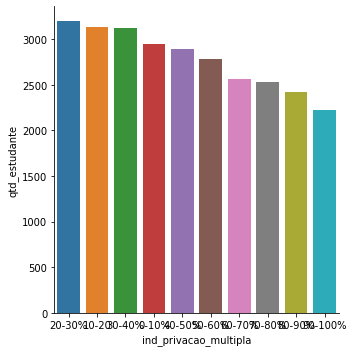

In [380]:
g4 = sns.catplot(x='ind_privacao_multipla', y='qtd_estudante', kind='bar', data=regiao_depravacao_group_1) 
#g.ax.set_ylim(0,100)
#Este código percorre os patches contidos no objeto ax do gráfico e obtém os valores de altura arredondados para 1 decimal, 
#adiciona o sinal de porcentagem e coloca esse texto no topo das barras.
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

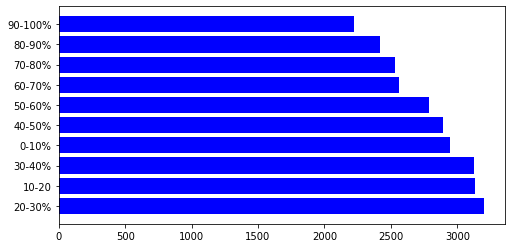

In [381]:
plt.figure(figsize=(8,4))
plt.barh(regiao_depravacao_group_1['ind_privacao_multipla'], regiao_depravacao_group_1['qtd_estudante'], color='#0000FF')
plt.show()

In [382]:
def corrigir_idade(idade):
    idade = idade.replace('<=','')
    return idade

In [383]:
informacao_estudante_sem_duplicado['faixa_etaria'] = informacao_estudante_sem_duplicado['faixa_etaria'].apply(corrigir_idade)
informacao_estudante_sem_duplicado

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55,0,240,N,Pass,3.0,0,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3.0,0,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2.0,0,1
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,1.0,0,1
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,1.0,0,1
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,2.0,1,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,1.0,0,1


In [384]:
informacao_estudante_sem_duplicado[['id_estudante','faixa_etaria']].groupby(['faixa_etaria']).count()

,id_estudante
faixa_etaria,
0-35,20145
35-55,8462
55,178


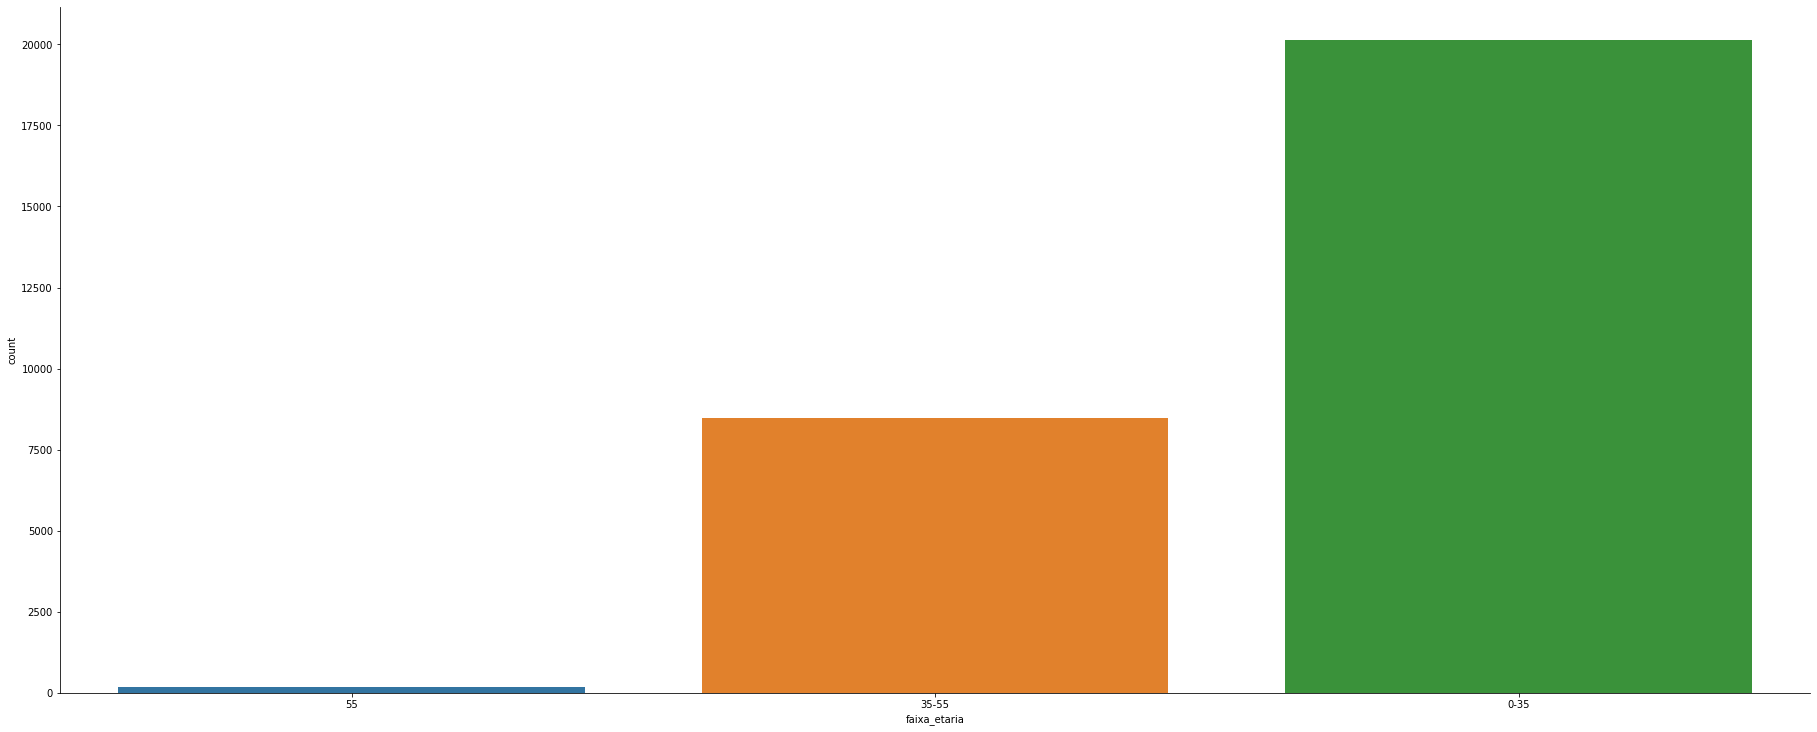

In [385]:
sns.catplot(x= 'faixa_etaria', kind='count', data=informacao_estudante_sem_duplicado, height=10.27, aspect=22.7/9.27)

In [386]:
studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [387]:
studentAssessment['score'] = studentAssessment['score'].fillna(0)

In [388]:
studentAssessment_traducao = {'id_assessment':'id_avaliacao',
'id_student':'id_estudante',
'date_submitted':'data_envio',
'is_banked': 'repostado_de_outra_avaliacao',
'score':'pontos'
    
}

In [389]:
studentAssessment = studentAssessment.rename(columns=studentAssessment_traducao)
studentAssessment.head(5)

,id_avaliacao,id_estudante,data_envio,repostado_de_outra_avaliacao,pontos
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [390]:
#quantos alunos repostaram um avaliação

studentAssessment[['repostado_de_outra_avaliacao', 'id_estudante']].groupby(['repostado_de_outra_avaliacao']).count()

,id_estudante
repostado_de_outra_avaliacao,
0,172003
1,1909


In [391]:
assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [392]:
print('Datatype assessments ')
assessments.dtypes

Datatype assessments 


code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [393]:
assessments['weight'] = assessments['weight'].fillna(0)

In [394]:
assessments_traducao = {'code_module':'cod_modulo',
'code_presentation':'cod_apresentacao',
'id_assessment':'id_avaliacao',
'assessment_type':'tipo_avaliacao',
'date':'data_final_envio',
'weight':'peso'
}

In [395]:
assessments = assessments.rename(columns=assessments_traducao)
assessments_agrupamento = pd.DataFrame(assessments.groupby(['cod_modulo', 'cod_apresentacao', 'tipo_avaliacao']).agg({'peso': np.mean}).round(2)).reset_index()
assessments_agrupamento

,cod_modulo,cod_apresentacao,tipo_avaliacao,peso
0,AAA,2013J,Exam,100.00
1,AAA,2013J,TMA,20.00
2,AAA,2014J,Exam,100.00
3,AAA,2014J,TMA,20.00
4,BBB,2013B,CMA,1.00
5,BBB,2013B,Exam,100.00
6,BBB,2013B,TMA,15.83
7,BBB,2013J,CMA,1.00
8,BBB,2013J,Exam,100.00
9,BBB,2013J,TMA,15.83


In [396]:
assessments.sample(3)

,cod_modulo,cod_apresentacao,id_avaliacao,tipo_avaliacao,data_final_envio,peso
135,FFF,2013B,34864,TMA,166.0,25.0
30,BBB,2013J,14997,TMA,47.0,18.0
37,BBB,2014B,15016,CMA,82.0,1.0


In [397]:
assessments.tipo_avaliacao.unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [398]:
assessments.groupby(['tipo_avaliacao']).get_group('Exam')

,cod_modulo,cod_apresentacao,id_avaliacao,tipo_avaliacao,data_final_envio,peso
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [399]:
estudante_avaliacao_merge = pd.merge(studentAssessment, assessments, how='left', on='id_avaliacao')

In [400]:
estudante_avaliacao_merge_grop = estudante_avaliacao_merge.groupby([ 'id_estudante',
       'repostado_de_outra_avaliacao', 'pontos', 'cod_modulo',
       'cod_apresentacao', 'tipo_avaliacao','peso']).agg({'pontos':np.sum})
estudante_avaliacao_merge_grop

pontos
id_estudante repostado_de_outra_avaliacao pontos cod_modulo cod_apresentacao tipo_avaliacao peso        
6516         0                            48.0   AAA        2014J            TMA            20.0    48.0
                                          60.0   AAA        2014J            TMA            10.0    60.0
                                          61.0   AAA        2014J            TMA            20.0    61.0
                                          63.0   AAA        2014J            TMA            20.0    63.0
                                          77.0   AAA        2014J            TMA            30.0    77.0
...                                                                                                  ...
2698577      0                            100.0  BBB        2014J            TMA            0.0    100.0
2698588      0                            85.0   BBB        2014J            TMA            10.0    85.0
                                          87.0   BBB        2014J            TMA            20.0    87.0
                                          95.0   BBB        2014J            TMA            35.0   190.0
                                          100.0  BBB        2014J            TMA            0.0    100.0

[153282 rows x 1 columns]

In [401]:
estudante_avaliacao_merge.columns

Index(['id_avaliacao', 'id_estudante', 'data_envio',
       'repostado_de_outra_avaliacao', 'pontos', 'cod_modulo',
       'cod_apresentacao', 'tipo_avaliacao', 'data_final_envio', 'peso'],
      dtype='object')

In [402]:
estudante_avaliacao_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 10 columns):
id_avaliacao                    173912 non-null int64
id_estudante                    173912 non-null int64
data_envio                      173912 non-null int64
repostado_de_outra_avaliacao    173912 non-null int64
pontos                          173912 non-null float64
cod_modulo                      173912 non-null object
cod_apresentacao                173912 non-null object
tipo_avaliacao                  173912 non-null object
data_final_envio                171047 non-null float64
peso                            173912 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 14.6+ MB


In [403]:
# qual avaliacao que teve maior numero de pontos 
estudante_avaliacao_merge_sort = estudante_avaliacao_merge[['tipo_avaliacao', 'peso']].groupby(['tipo_avaliacao']).sum().reset_index()
estudante_avaliacao_merge_sort = estudante_avaliacao_merge_sort.sort_values(by='peso', ascending=False)
estudante_avaliacao_merge_sort.index=range(3)
estudante_avaliacao_merge_sort

,tipo_avaliacao,peso
0,TMA,1630766.0
1,Exam,495900.0
2,CMA,89651.0


In [404]:
# média dos pontos de cada tipo de avaliacao
media_pontos_avaliacao =  estudante_avaliacao_merge[['pontos', 'tipo_avaliacao']].groupby(['tipo_avaliacao']).mean().reset_index().rename(columns={'pontos':'media_pontos'})
media_pontos_avaliacao = media_pontos_avaliacao.sort_values(by='media_pontos', ascending=False)
media_pontos_avaliacao.index=range(3)
media_pontos_avaliacao

,tipo_avaliacao,media_pontos
0,CMA,81.027053
1,TMA,72.435850
2,Exam,65.572898


In [405]:
media_pontos_avaliacao_peso =  estudante_avaliacao_merge[['peso', 'tipo_avaliacao']].groupby(['tipo_avaliacao']).mean().reset_index()
media_pontos_avaliacao_peso = media_pontos_avaliacao_peso.sort_values(by='peso', ascending=False)
media_pontos_avaliacao_peso.index=range(3)
media_pontos_avaliacao_peso

,tipo_avaliacao,peso
0,Exam,100.000000
1,TMA,16.568447
2,CMA,1.271159


Exam possui maior média de pesos, logo possui uma maior importancia

In [406]:
estudante_avaliacao_merge

,id_avaliacao,id_estudante,data_envio,repostado_de_outra_avaliacao,pontos,cod_modulo,cod_apresentacao,tipo_avaliacao,data_final_envio,peso
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [407]:
# modulo com maior média de pontos

media_pontos_modulo =  estudante_avaliacao_merge[['pontos', 'cod_modulo']].groupby(['cod_modulo']).mean().reset_index()
media_pontos_modulo = media_pontos_modulo.sort_values(by='pontos', ascending=False)
media_pontos_modulo.index=range(7)
media_pontos_modulo['pontos'] =media_pontos_modulo['pontos'].astype(int)
media_pontos_modulo

,cod_modulo,pontos
0,EEE,81
1,GGG,79
2,FFF,77
3,BBB,76
4,CCC,73
5,DDD,69
6,AAA,68


In [408]:
media_aprovado_reprovado.head(5)

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
2,23629,Fail,161.0
3,23698,Pass,910.0
4,24186,Pass,184.0


# Identificando e removendo Outliers

In [409]:
selecao = media_aprovado_reprovado['resultado_final'] == 'Pass'
df_aprovado_click = media_aprovado_reprovado[selecao]
df_aprovado_click

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
3,23698,Pass,910.0
4,24186,Pass,184.0
5,24213,Pass,1992.0
...,...,...,...
18681,2697885,Pass,1986.0
18683,2697921,Pass,1767.0
18684,2698125,Pass,1243.0
18686,2698257,Pass,758.0


In [410]:
selecao = media_aprovado_reprovado['resultado_final'] == 'Fail'
df_reprovado_click = media_aprovado_reprovado[selecao]
df_reprovado_click

,id_estudante,resultado_final,qtd_click
2,23629,Fail,161.0
11,26247,Fail,478.0
13,26734,Fail,210.0
14,26915,Fail,61.0
15,27189,Fail,2638.0
...,...,...,...
18682,2697921,Fail,2319.0
18685,2698251,Fail,1511.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


In [411]:
df_aprovado_click_somente = df_aprovado_click['qtd_click']
df_aprovado_click_somente

0        2791.0
1         934.0
3         910.0
4         184.0
5        1992.0
          ...  
18681    1986.0
18683    1767.0
18684    1243.0
18686     758.0
18687    3455.0
Name: qtd_click, Length: 11881, dtype: float64

In [412]:
df_reprovado_click_somente = df_reprovado_click['qtd_click']
df_reprovado_click_somente

2         161.0
11        478.0
13        210.0
14         61.0
15       2638.0
          ...  
18682    2319.0
18685    1511.0
18688     717.0
18689       0.0
18690       0.0
Name: qtd_click, Length: 6810, dtype: float64

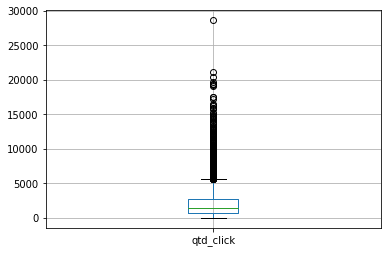

In [413]:
df_aprovado_click.boxplot(['qtd_click'])

In [414]:
Q1_aprovado = df_aprovado_click_somente.quantile(.25)
Q1_aprovado

691.0

In [415]:
Q3_aprovado = df_aprovado_click_somente.quantile(.75)
Q3_aprovado

2689.0

In [416]:
IIQ = Q3_aprovado - Q1_aprovado
limite_inferior = Q1_aprovado - 1.5 * IIQ
limite_superior = Q1_aprovado + 1.5 * IIQ


In [417]:
limite_inferior

-2306.0

In [418]:
limite_superior

3688.0

In [419]:
selecao_aprovado = (df_aprovado_click_somente >=limite_inferior) & (df_aprovado_click_somente <= limite_superior)
selecao_aprovado

0        True
1        True
3        True
4        True
5        True
         ... 
18681    True
18683    True
18684    True
18686    True
18687    True
Name: qtd_click, Length: 11881, dtype: bool

In [420]:
aprovado_new = df_aprovado_click[selecao_aprovado]
aprovado_new

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
3,23698,Pass,910.0
4,24186,Pass,184.0
5,24213,Pass,1992.0
...,...,...,...
18681,2697885,Pass,1986.0
18683,2697921,Pass,1767.0
18684,2698125,Pass,1243.0
18686,2698257,Pass,758.0


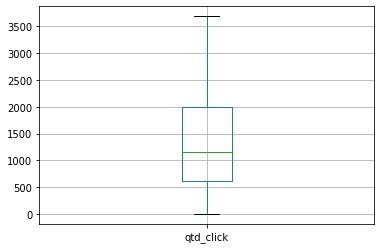

In [421]:
aprovado_new.boxplot(['qtd_click'])

In [422]:
Q1_reprovado = df_reprovado_click_somente.quantile(.25)
Q1_reprovado

102.0

In [423]:
Q3_reprovado = df_reprovado_click_somente.quantile(.75)
Q3_reprovado

829.75

In [424]:
IIQ = Q3_reprovado - Q1_reprovado
limite_inferior = Q1_reprovado - 1.5 * IIQ
limite_superior = Q1_reprovado + 1.5 * IIQ

In [425]:
selecao_reprovado = (df_reprovado_click_somente >=limite_inferior) & (df_reprovado_click_somente <= limite_superior)
selecao_reprovado

2         True
11        True
13        True
14        True
15       False
         ...  
18682    False
18685    False
18688     True
18689     True
18690     True
Name: qtd_click, Length: 6810, dtype: bool

In [426]:
dados_reprovado_new = df_reprovado_click[selecao_reprovado]
dados_reprovado_new

,id_estudante,resultado_final,qtd_click
2,23629,Fail,161.0
11,26247,Fail,478.0
13,26734,Fail,210.0
14,26915,Fail,61.0
17,27759,Fail,366.0
...,...,...,...
18677,2696376,Fail,282.0
18680,2697773,Fail,148.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


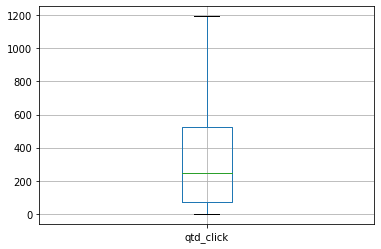

In [427]:
dados_reprovado_new.boxplot(['qtd_click'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002863A8B7FC8>]],
      dtype=object)

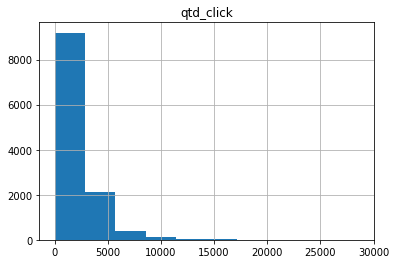

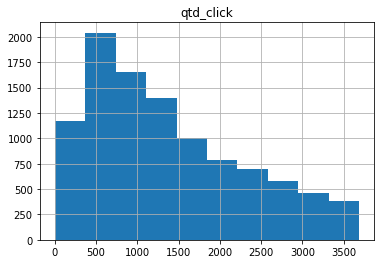

In [428]:
df_aprovado_click.hist(['qtd_click'])
aprovado_new.hist('qtd_click')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002864D81B288>]],
      dtype=object)

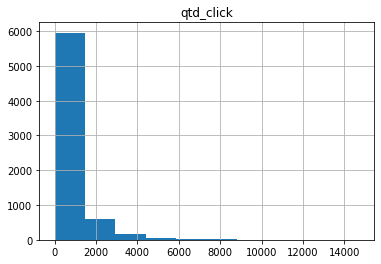

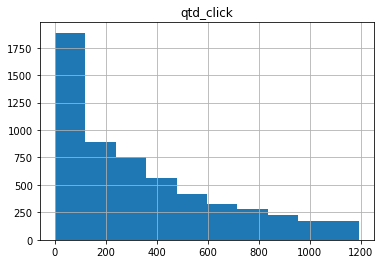

In [429]:
df_reprovado_click.hist(['qtd_click'])
dados_reprovado_new.hist('qtd_click')

# Teste Estatístico

In [430]:
r1 = ranksums(df_aprovado_click['qtd_click'],df_reprovado_click['qtd_click'])
r1

RanksumsResult(statistic=69.8081182754003, pvalue=0.0)

In [431]:
r2 = ranksums(aprovado_new['qtd_click'],dados_reprovado_new['qtd_click'])
r2

RanksumsResult(statistic=79.39468488549255, pvalue=0.0)

In [432]:
print('o valor do p-value é {}'.format(r1.pvalue))

o valor do p-value é 0.0


Valores-P baixos (<0.05): seus dados não são prováveis com uma hipótese nula verdadeira.

Neste caso ficamos com A hipótese alternativa : há diferença entre os grupos experimentais no nível da população.

- Selecione duas amostras de **6000 registros** para cada um dos dois status (aprovado e reprovado) para realizar o teste. Utilizei o **parâmetro random_state=101**.
- Considerando o **nível de significância de 5%**.
- Teste a hipótese de que a **A quantidade de click dos reprovados é menor do que dos aprovados**.


In [433]:
df_reprovado_click = df_reprovado_click.sample(n=6000, random_state=101).qtd_click
df_reprovado_click

16433      33.0
12552     173.0
4633     1147.0
6556      883.0
3253      229.0
          ...  
18608     303.0
17855     365.0
5681       25.0
6306      385.0
5198        0.0
Name: qtd_click, Length: 6000, dtype: float64

16433      33.0
12552     173.0
4633     1147.0
6556      883.0
3253      229.0
          ...  
18608     303.0
17855     365.0
5681       25.0
6306      385.0
5198        0.0
Name: qtd_click, Length: 6000, dtype: float64

In [435]:
df_aprovado_click = df_aprovado_click.sample(n=6000, random_state=101).qtd_click
df_aprovado_click

9793     1736.0
4409      984.0
1440      334.0
5205      444.0
8234     4351.0
          ...  
3066     5260.0
15029    1589.0
12533     866.0
6104      531.0
17865    1555.0
Name: qtd_click, Length: 6000, dtype: float64

## Verificando se a distribuição é normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002863AC2BE88>]],
      dtype=object)

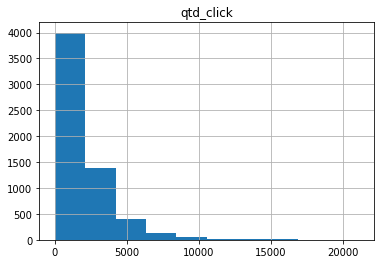

In [436]:
df_apv_click = pd.DataFrame(df_aprovado_click)
df_apv_click.hist('qtd_click')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002864039BB88>]],
      dtype=object)

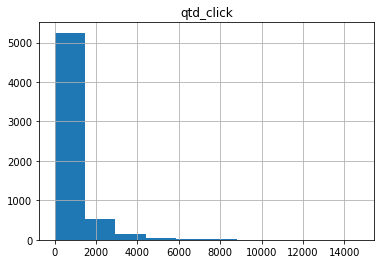

In [437]:
df_rpv_click = pd.DataFrame(df_reprovado_click)
df_rpv_click.hist('qtd_click')

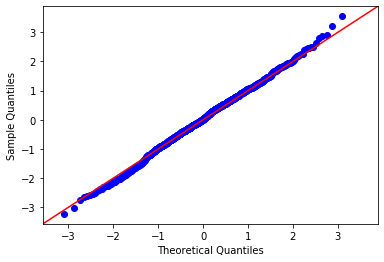

In [438]:
import statsmodels.api as sm  # é normal se obedecer a uma reta
from scipy.stats import norm
import pylab
df_rpv_click = norm.rvs(size=1000)
sm.qqplot(df_rpv_click, line='45')
pylab.show()


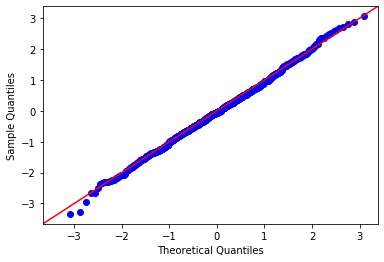

In [439]:
import statsmodels.api as sm  # é normal se obedecer a uma reta
from scipy.stats import norm
import pylab
df_apv_click = norm.rvs(size=1000)
sm.qqplot(df_apv_click, line='45')
pylab.show()


### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [457]:
significancia = 0.05

In [440]:
media_reprovado = df_reprovado_click.mean()
media_reprovado

675.2091666666666

In [441]:
media_aprovado = df_aprovado_click.mean()
media_aprovado

1978.074

In [442]:
desvio_reprovado = df_reprovado_click.std()
desvio_reprovado

1008.4319637868044

In [443]:
desvio_aprovado = df_aprovado_click.std()
desvio_aprovado

1957.5385653237556

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>A hipótese nula sempre contém a alegação de igualdade</font>

a quantidade de click dos aprovados é igual a dos reprovados?

### O tamanho da amostra é maior que 30?
#### Resp.:  SIM

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.:  NÃO

### O desvio padrão populacional é conhecido?
#### Resp.: NÃO

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### Utilizando DescrStatsW

In [448]:
from statsmodels.stats.weightstats import DescrStatsW
test_reprovado = DescrStatsW(df_reprovado_click)
test_aprovado = DescrStatsW(df_aprovado_click)

In [449]:
test_A= test_reprovado.get_compare(test_aprovado)

In [450]:
z,p_valor = test_A.ztest_ind(alternative='smaller', value=0)

In [451]:
print('estatística z =',z)
print('p-valor = ',p_valor)

estatística z = -45.830407609782206
p-valor =  0.0


### Utilizando CompareMeans

In [453]:
from statsmodels.stats.weightstats import CompareMeans
test_B = CompareMeans(test_reprovado, test_aprovado)

In [454]:
z,p_valor = test_B.ztest_ind(alternative='smaller', value=0)

In [455]:
print('estatística z =',z)
print('p-valor = ',p_valor)

estatística z = -45.830407609782206
p-valor =  0.0


In [458]:
p_valor <= significancia

True

### <font color='green'>Conclusão: (com nível de confiança de 95%, rejeitamos H0, isto é, conluímos que a quantidade de clicks dos reprovados é menor do que os aprovados

-**Teste z** se adequa para amostras grande acima de **30 registros** enquanto o **teste t** deve ser escolhido para amostras pequenas de **até 30 registros**

In [481]:
selecao = informacao_estudante_sem_duplicado.id_deficiencia == 0
localizar_selecao =  informacao_estudante_sem_duplicado[selecao]
localizar_selecao= localizar_selecao['id_deficiencia']
localizar_selecao

0        0
1        0
3        0
4        0
5        0
        ..
32586    0
32588    0
32589    0
32591    0
32592    0
Name: id_deficiencia, Length: 26068, dtype: int32

In [484]:
informacao_estudante_sem_duplicado['estudante_nao_pcd'] = localizar_selecao

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [483]:
informacao_estudante_sem_duplicado.drop(columns=['estudante_nao_pcd'])

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_nivel_educacao,id_deficiencia,id_sexo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55,0,240,N,Pass,3.0,0,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3.0,0,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.0,1,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2.0,0,1
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,1.0,0,1
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,1.0,0,1
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,2.0,1,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,1.0,0,1


In [486]:
informacao_estudante_sem_duplicado.to_csv('estudantes.csv', sep=';',index=False )

In [487]:
informacao_estudante_sem_duplicado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28785 entries, 0 to 32592
Data columns (total 16 columns):
cod_modulo               28785 non-null object
cod_apresentacao         28785 non-null object
id_estudante             28785 non-null int64
sexo                     28785 non-null object
regiao                   28785 non-null object
nivel_educacao           28785 non-null object
ind_privacao_multipla    27814 non-null object
faixa_etaria             28785 non-null object
qtd_inscricao_modulo     28785 non-null int64
nu_credito               28785 non-null int64
deficiencia              28785 non-null object
resultado_final          28785 non-null object
id_nivel_educacao        28785 non-null float64
id_deficiencia           28785 non-null int32
id_sexo                  28785 non-null int64
estudante_nao_pcd        26068 non-null float64
dtypes: float64(2), int32(1), int64(4), object(9)
memory usage: 4.9+ MB
